In [1]:
!pip install featurewiz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.5/150.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 9.6 MB/s eta 0:00:00
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2436 sha256=4295e8a5e45b6e9aeef2992b4a0e362f095c7d3572becee0811c6c80bd277f2f
  Stored in directory: /root/.cache/pip/wheels/a6/ff/5d/4f10de26fe

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from featurewiz import featurewiz
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("materials.csv")

df.drop(columns=["material_id", "formula_pretty", "Unnamed: 0"], axis=1, inplace=True)

df.dropna(inplace=True)

label_encoder = LabelEncoder()

df["is_magnetic"] = label_encoder.fit_transform(df["is_magnetic"])
df["ordering"] = label_encoder.fit_transform(df["ordering"])
df["is_gap_direct"] = label_encoder.fit_transform(df["is_gap_direct"])
df["is_metal"] = label_encoder.fit_transform(df["is_metal"])

Imported lazytransform v1.16. 

Imported featurewiz 0.5.7. Use the following syntax:
    >>> wiz = FeatureWiz(feature_engg = '', nrows=None, transform_target=True,
        		category_encoders="auto", auto_encoders='VAE', ae_options={},
        		add_missing=False, imbalanced=False, verbose=0)
    >>> X_train_selected, y_train = wiz.fit_transform(X_train, y_train)
    >>> X_test_selected = wiz.transform(X_test)
    >>> selected_features = wiz.features
    


In [3]:
scaler = StandardScaler()

scaled = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled, columns=df.columns)

In [4]:
X = scaled_df.drop(["band_gap"], axis=1)

y = scaled_df["band_gap"]

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=1
)

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
    Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
    Single_Label Regression problem 
    Loaded train data. Shape = (23604, 17)
    Single_Label Regression problem 
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
    Single_Label Regression problem 
    loading a sequential sample of 10000 rows into pandas for EDA
#######################################################################

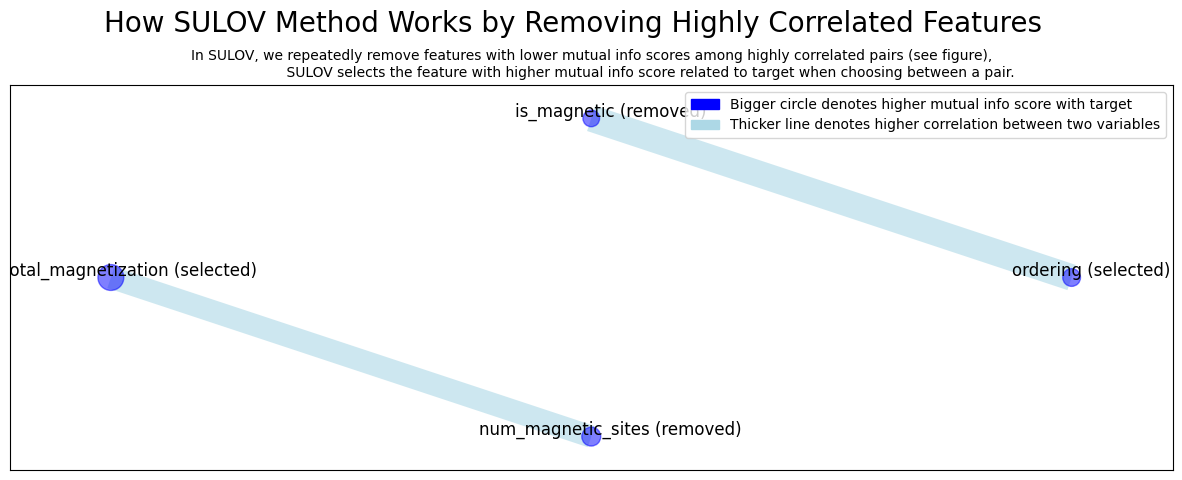

Time taken for SULOV method = 2 seconds
    Adding 0 categorical variables to reduced numeric variables  of 14
Final list of selected 14 vars after SULOV = ['nelements', 'volume', 'density', 'density_atomic', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'efermi', 'is_gap_direct', 'is_metal', 'total_magnetization_normalized_vol', 'total_magnetization', 'ordering']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
    Taking top 3 features per iteration...
    Number of booster rounds = 100
        Selected: ['is_metal', 'formation_energy_per_atom', 'efermi']
            Time taken for regular XGBoost feature selection = 22 seconds
   

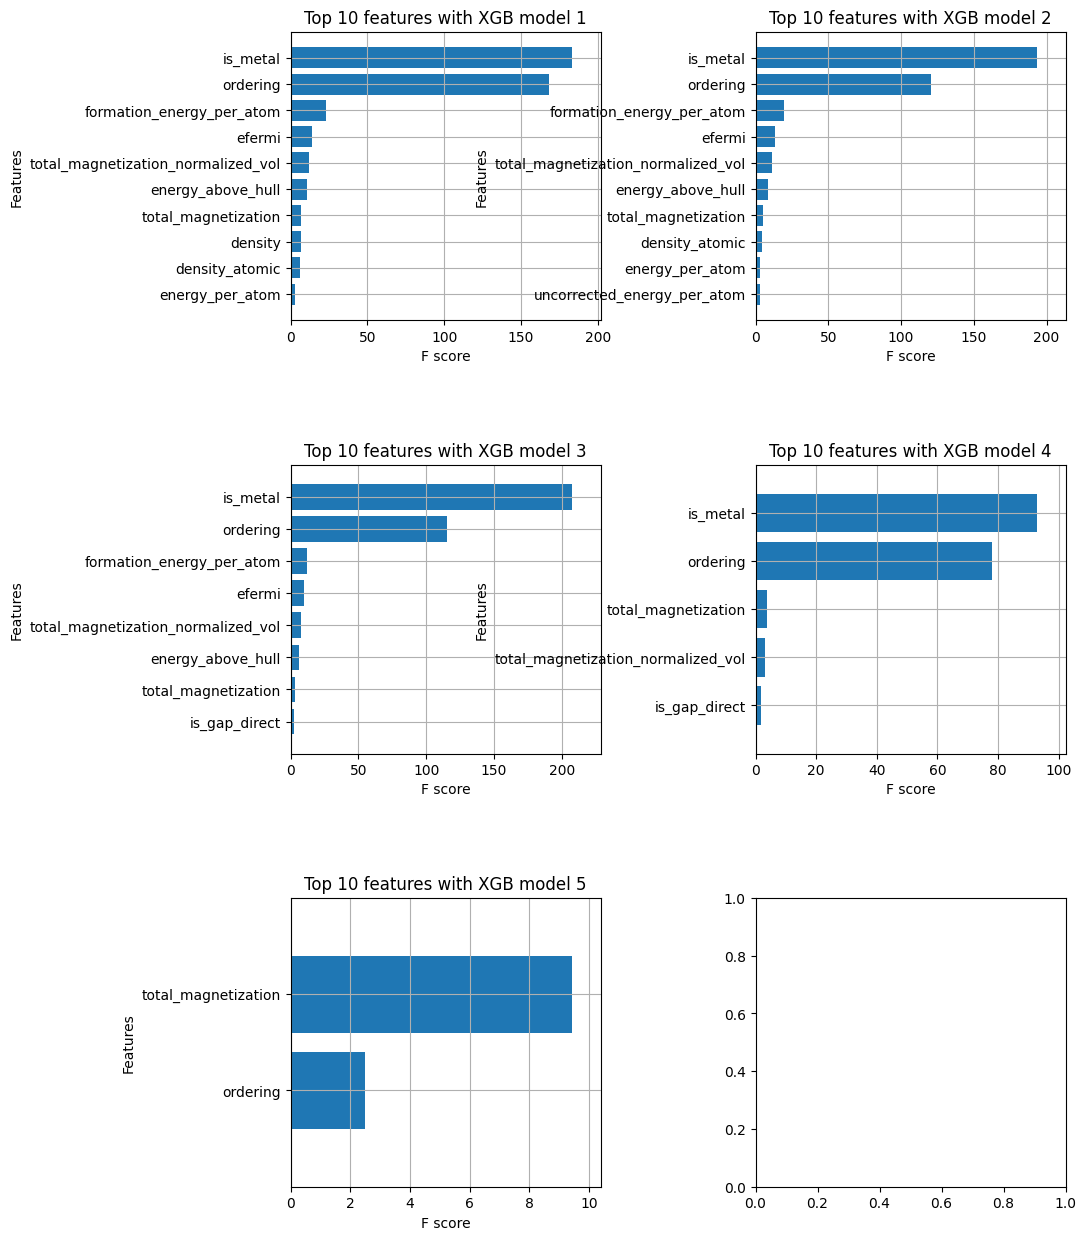

    Completed XGBoost feature selection in 68 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 6 important features:
['is_metal', 'formation_energy_per_atom', 'efermi', 'ordering', 'total_magnetization_normalized_vol', 'total_magnetization']
Total Time taken for featurewiz selection = 70 seconds
Output contains a list of 6 important features and a train dataframe
['is_metal', 'formation_energy_per_atom', 'efermi', 'ordering', 'total_magnetization_normalized_vol', 'total_magnetization']


In [6]:
target = "band_gap"

features, train = featurewiz(
    df,
    target,
    corr_limit=0.7,
    verbose=2,
    sep=",",
    header=0,
    test_data="",
    feature_engg="",
    category_encoders="",
)

print(features)

In [7]:
from featurewiz import FeatureWiz

fwiz = FeatureWiz(
    feature_engg="",
    nrows=None,
    transform_target=True,
    scalers="std",
    category_encoders="auto",
    add_missing=False,
    verbose=0,
    imbalanced=False,
    ae_options={},
)
X_train_selected, y_train = fwiz.fit_transform(X_train, pd.DataFrame(y_train))
X_test_selected = fwiz.transform(X_valid)

fwiz.features

featurewiz is given 0.9 as correlation limit...
    Skipping feature engineering since no feature_engg input...
    final list of category encoders given: ['onehot', 'label']
    final list of scalers given: [std]
Loaded input data. Shape = (18883, 16)
#### Starting featurewiz transform for train data ####
    Regression models don't need targets to be transformed to numeric...
    Single_Label Regression problem 
Shape of dataset: (18883, 16). Now we classify variables into different types...
Time taken to define data pipeline = 1 second(s)
No model input given...
Lazy Transformer Pipeline created...
    Time taken to fit dataset = 1 second(s)
    Time taken to transform dataset = 1 second(s)
    Shape of transformed dataset: (18883, 16)
    Single_Label Regression problem 
Starting SULOV with 16 features...
    there are no null values in dataset...
    there are no null values in target column...
Completed SULOV. 15 features selected
Performing recursive XGBoost feature selection fr

['is_metal',
 'formation_energy_per_atom',
 'efermi',
 'total_magnetization',
 'total_magnetization_normalized_vol',
 'num_magnetic_sites',
 'ordering']

In [8]:
from sklearn.feature_selection import RFE

model = RandomForestRegressor()

rfe_selector = RFE(estimator=model, n_features_to_select=7)

X_new = rfe_selector.fit_transform(X, y)

selected_features = rfe_selector.support_

In [9]:
print(X.columns[selected_features])

Index(['density', 'density_atomic', 'formation_energy_per_atom', 'efermi',
       'is_metal', 'ordering', 'total_magnetization_normalized_vol'],
      dtype='object')
